# Efficienza Secondo Rivelatore

# New Code
## Nuove misure prese con :
* dt = 150 ns (impostato a 0)
* delay = 5 ns

## Misura dell'Efficienza dei Rivelatori (updated to 11th December 2024)

Dimensioni rivelatori: ...



Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$


Tensioni: 

I conteggi vengono effettuati ogni 5 minuti.

$\Delta t$ = 50 $ns$

WDT = 169

dt = 150 ns (impostato a 0)

delay = 5 ns (per tutti e tre i rivelatori)



* N.B.: Non si è tenuto conto delle coincidenze accidentali (il conteggio è stato fatto ed è un numero trascurabile rispetto al numero di conteggi singoli)


### Esempio: Efficienza del Secondo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al secondo e al terzo rivelatore: 




$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_1 \,\epsilon_3$ $=$ $N_{1,3} $ 

$\Rightarrow$ $\epsilon_2 = \frac{N_{triple}}{N_{1,3}} $

### N.B.: 
Per trovare il valore ottimale di Threshold, aspettiamo di scendere sotto al 90% di efficienza e ci fermiamo (con quel voltaggio)

Per l'efficienza del secondo rivelatore, ci mettiamo in un intorno di V = 1050 V (valore che avevamo qualitativamente verificato essere ottimale), testando V = 1000, 1050, 1100 V a diverse threshold. 
Ci aspettiamo che V = 1050 V e Th = 70 mV siano i parametri ottimali.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# LateX font:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

## Studio dell'Efficienza dello Scintillatore 2

* Voltaggio dello scintillatore 1:  $V_1 = 1150 \,V$
* Threshold dello scintillatore 1:  $Th_1 = 60 \,mV$



* Voltaggio dello scintillatore 3:  $V_3 = 1050 \,V$
* Threshold dello scintillatore 3:  $Th_3 = 70 \,mV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 2 è massima.

## Crea i dataframes :

In [3]:
# Rivelatore 2: le doppie sono 1,3

data_1 = {
        'V [V]': np.full(13, 1000),
        'Th [mV]' : [0, 50, 100, 10, 20, 30, 40, 60, 70, 80, 90, 130, 150],
    
        'N_singole_1': [64309, 59970, 35829, 31085, 31020, 31694, 30999, 30867, 30510, 30673, 30252, 30405, 30848, ],
        'N_singole_2': [881469, 10852, 6606, 133447, 49935, 22915, 13796, 9708, 9080, 8423, 7672, 3781, 2533, ],
        'N_singole_3': [13002, 12837, 12541, 12764, 12532, 12753, 12411, 12743, 12512, 12573, 12555, 12430, 12642, ],
    
        'N_doppie_12' : [14892, 7191, 5371, 7874, 7537, 7626, 7174, 7061, 6971, 6569, 6208, 3094, 2005, ],
        'N_doppie_13' : [6016, 5885, 5679, 5831, 5821, 6068, 5765, 5894, 5911, 5796, 5726, 5838, 5895, ],
        'N_doppie_23' : [7830, 6834, 5189, 7137, 7046, 7155, 6776, 6872, 6694, 6418, 5921, 2946, 1976, ],
    
        'N_triple' : [5998, 5856, 4520, 5819, 5798, 6044, 5745, 5842, 5796, 5547, 5149, 2543, 1644],
}
df_1= pd.DataFrame(data_1)

In [4]:
df_1_sorted = df_1.sort_values(by='Th [mV]')

df_1 = df_1_sorted
df_1

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple
0,1000,0,64309,881469,13002,14892,6016,7830,5998
3,1000,10,31085,133447,12764,7874,5831,7137,5819
4,1000,20,31020,49935,12532,7537,5821,7046,5798
5,1000,30,31694,22915,12753,7626,6068,7155,6044
6,1000,40,30999,13796,12411,7174,5765,6776,5745
1,1000,50,59970,10852,12837,7191,5885,6834,5856
7,1000,60,30867,9708,12743,7061,5894,6872,5842
8,1000,70,30510,9080,12512,6971,5911,6694,5796
9,1000,80,30673,8423,12573,6569,5796,6418,5547
10,1000,90,30252,7672,12555,6208,5726,5921,5149


In [5]:
data_2 = {
        'V [V]': np.full(17, 1050),
        'Th [mV]' : [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 150, 170, 200, ],
    
        'N_singole_1': [30786, 30588, 30714, 30765, 30987, 29795, 29840, 30453, 30362, 30735, 
                       30456, 30236, 30379, 30828, 30460, 30360, 30162, ],
        'N_singole_2': [1255115, 224342, 110517, 57316, 31668, 19937, 14589, 12053, 10321, 9762, 
                       9205, 8637, 8346, 7952, 6386, 4671, 2943, ],
        'N_singole_3': [12414, 12695, 12472, 12461, 12673, 12554, 12747, 12673, 12624, 12697, 
                       12769, 12565, 12591, 12663, 12679, 12448, 12537, ],
    
        'N_doppie_12' : [10726, 8370, 7741, 7445, 7343, 7146, 7316, 7376, 7024, 7026, 
                        6933, 6680, 6578, 6420, 5238, 3774, 2416, ],
        'N_doppie_13' : [5831, 5823, 5797, 5767, 5817, 5724, 5904, 5946, 5765, 5833, 
                        5846, 5739, 5825, 5945, 5744, 5629, 5885, ],
        'N_doppie_23' : [7712, 7255, 7097, 6905, 6964, 6860, 7024, 6955, 6694, 6733, 
                        6684, 6425, 6402, 6154, 5032, 3641, 2287, ],
    
        'N_triple' : [5818, 5803, 5779, 5743, 5788, 5703, 5880, 5920, 5726, 5774,
                     5742, 5559, 5515, 5408, 4389, 3142, 1975],
}
df_2 = pd.DataFrame(data_2)

In [29]:
# Rivelatore 1 : le doppie sono 2,3

data_3 = {
        'V [V]': np.full(20, 1100),
        'Th [mV]' : [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 
                     140, 150, 160, 170, 200, 230, ],
    
        'N_singole_1': [30180, 30001, 29797, 30132, 30040, 30446, 30439, 29780, 30114, 29834, 30061, 29902, 29985, 30038, 
                       29891, 30260, 29903, 30368, 30018, 30407, ],
        'N_singole_2': [1478948, 350033, 191893, 119767, 75431, 47994, 31821, 22526, 17451, 14075, 12302, 10951, 10213, 9689, 
                       9345, 9129, 8693, 8342, 7123, 5256, ],
        'N_singole_3': [12590, 12522, 12496, 12687, 12566, 12661, 12441, 12518, 12743, 12555, 12608, 12500, 12471, 12531,
                       12450, 12642, 12432, 12597, 12692, 12480, ],
    
        'N_doppie_12' : [10702, 8783, 7982, 7818, 7477, 7542, 7449, 7156, 7370, 7157, 7235, 7218, 7085, 6996, 
                        6912, 6987, 6782, 6510, 5805, 4246],
        'N_doppie_13' : [5864, 5883, 5782, 5925, 5786, 5955, 5895, 5713, 5932, 5777, 5949, 5861, 5848, 5831, 
                        5799, 5893, 5820, 5736, 5901, 5815, ],
        'N_doppie_23' : [7762, 7331, 7164, 7224, 6974, 7154, 7032, 6829, 7044, 6843, 6990, 6847, 6841, 6767, 
                        6665, 6680, 6482, 6321, 5623, 4147, ],
    
        'N_triple' : [5841, 5865, 5764, 5902, 5770, 5928, 5874, 5692, 5906, 5752, 5922, 5836, 5801, 5773, 
                     5710, 5759, 5623, 5466, 4905, 3578, ],
}
df_3 = pd.DataFrame(data_3)

In [30]:
N_singole_2_1 = df_1['N_singole_2']/5
N_singole_2_2 = df_2['N_singole_2']/5
N_singole_2_3 = df_3['N_singole_2']/5

In [31]:
# Calcola le coincidenze accidentali : 
delta_t = 50*10**(-9) # s

dataframes = [df_1, df_2, df_3]  # List of DataFrames
results = {}  # Dictionary to store results

for i, df in enumerate(dataframes, start=1):  # Loop through DataFrames with an index
    # Calculate double coincidences
    N_doppie_acc_12 = df['N_singole_1'] / (5 * 60) * df['N_singole_2'] / (5 * 60) * delta_t
    N_doppie_acc_13 = df['N_singole_1'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    N_doppie_acc_23 = df['N_singole_2'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t

    # Calculate triple coincidences
    N_triple_acc = (
        df['N_singole_1'] / (5 * 60) *
        df['N_singole_2'] / (5 * 60) *
        df['N_singole_3'] / (5 * 60) *
        delta_t * delta_t
    )

    # Store results in the dictionary
    results[f'df_{i}'] = {
        'N_doppie_acc_12': N_doppie_acc_12,
        'N_doppie_acc_13': N_doppie_acc_13,
        'N_doppie_acc_23': N_doppie_acc_23,
        'N_triple_acc': N_triple_acc,
    }


In [32]:
for df in dataframes:
    df['N_doppie_acc_12'] = df['N_singole_1'] / (5 * 60) * df['N_singole_2'] / (5 * 60) * delta_t
    df['N_doppie_acc_13'] = df['N_singole_1'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    df['N_doppie_acc_23'] = df['N_singole_2'] / (5 * 60) * df['N_singole_3'] / (5 * 60) * delta_t
    df['N_triple_acc'] = (
        df['N_singole_1'] / (5 * 60) *
        df['N_singole_2'] / (5 * 60) *
        df['N_singole_3'] / (5 * 60) *
        delta_t * delta_t
    )

    # Errori : 
    
    df['epsilon_2'] = df['N_triple'] / df['N_doppie_13']
    df['sigma_epsilon_2'] = np.sqrt(
        df['epsilon_2'] / df['N_doppie_13'] * (1 - df['epsilon_2'])
    )

In [33]:
# Per rendere il confronto tra efficienze più facili, creo un dataframe le cui colonne saranno solo 
# i valori delle efficienze :
dataframes = [df_1, df_2, df_3]  # List of DataFrames
epsilon_data = {}  # Dictionary to store epsilon_1 values for comparison

for i, df in enumerate(dataframes, start=1):  # Loop through DataFrames
    epsilon_data[f'df_{i}'] = df['epsilon_2']

# Create a new DataFrame for epsilon_1 values
epsilon_df = pd.DataFrame(epsilon_data)

In [34]:
epsilon_df

# N.B. : Se alcuni valori sono NaN è solo perché non abbiamo preso quei dati
# inoltre questo confronto è poco fair perché efficienze della stessa riga NON
# corrispondono necessariamente a threshold uguali
# è giusto un confronto visivo tra voltaggi (e NON threshold)

,df_1,df_2,df_3
0,0.997008,0.997771,0.996078
1,0.995072,0.996565,0.996940
2,0.795915,0.996895,0.996887
3,0.997942,0.995838,0.996118
4,0.996049,0.995015,0.997235
5,0.996045,0.996331,0.995466
6,0.996531,0.995935,0.996438
7,0.991177,0.995627,0.996324
8,0.980545,0.993235,0.995617
9,0.957039,0.989885,0.995672


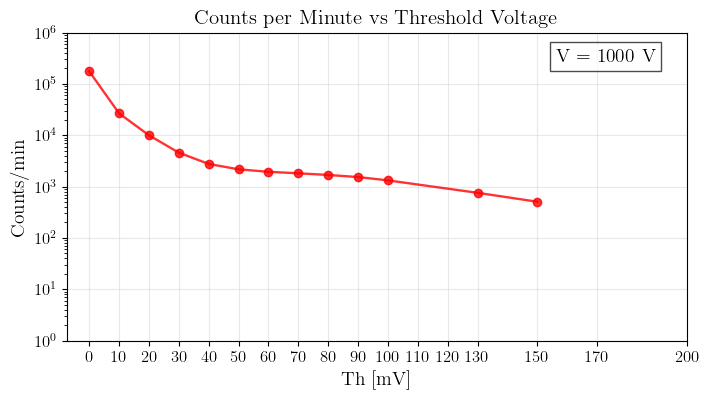

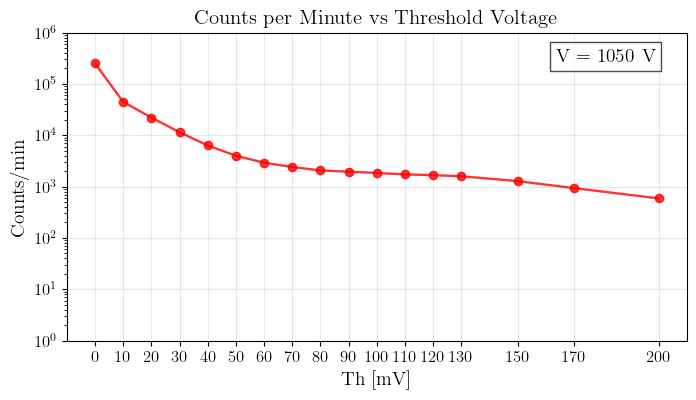

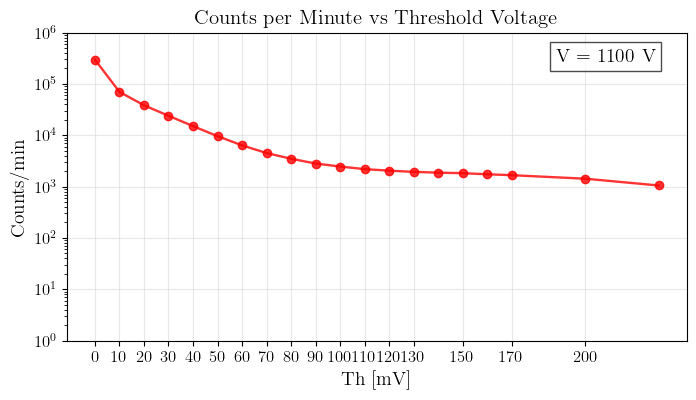

In [35]:
# DataFrames and corresponding y data
dataframes = [df_1, df_2, df_3]
y_data = [N_singole_2_1, N_singole_2_2, N_singole_2_3]
voltages = [1000, 1050, 1100]  # Corresponding voltages for each DataFrame

for i, (df, y, voltage) in enumerate(zip(dataframes, y_data, voltages), start=1):
    plt.figure(figsize=(8, 4))
    
    # Plot the data
    plt.plot(
        df['Th [mV]'], y,
        linestyle='-', marker='o', linewidth=1.7, color='r', alpha=0.8
    )
    
    # Add titles and labels
    plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
    plt.xlabel('Th [mV]', fontsize=14)
    plt.ylabel('Counts/min', fontsize=14)
    
    # Use a logarithmic scale for the y-axis
    plt.yscale('log')
    plt.ylim(10**0, 10**6)
    # Grid and tick settings
    plt.grid(True, color='lightgray', alpha=0.5)
    plt.xticks(
        ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 150, 170, 200],
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    plt.text(
        0.95, 0.95, f'V = {voltage} V', 
        fontsize=14, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
        transform=plt.gca().transAxes, ha='right', va='top'  # Position at the upper-right corner
    )
    
    # Show the plot
    plt.show()


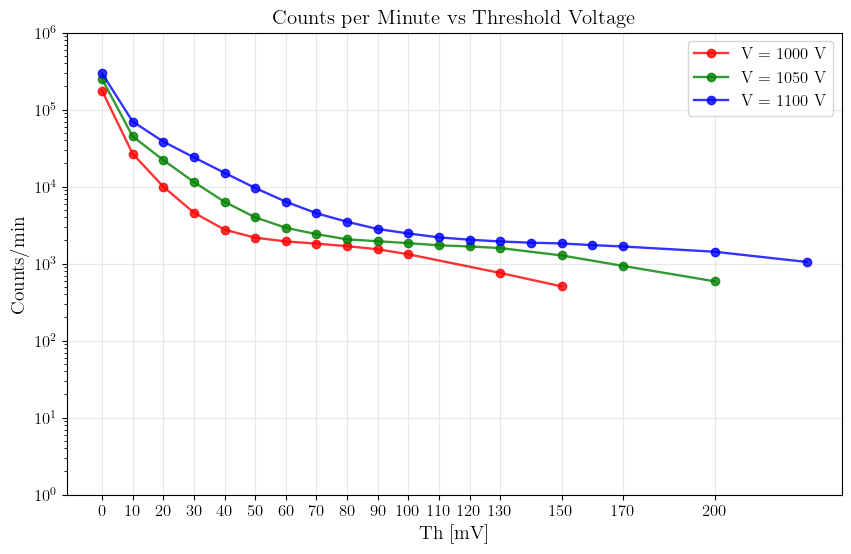

In [36]:
# Create a single figure for the three curves
plt.figure(figsize=(10, 6))

# Define colors for the curves
colors = ['r', 'g', 'b']  # Red, green, blue for each curve

for i, (df, y, voltage, color) in enumerate(zip(dataframes, y_data, voltages, colors), start=1):
    plt.plot(
        df['Th [mV]'], y,
        linestyle='-', marker='o', linewidth=1.7, color=color, alpha=0.8,
        label=f'V = {voltage} V'
    )

# Add titles and labels
plt.title('Counts per Minute vs Threshold Voltage', fontsize=15)
plt.xlabel('Th [mV]', fontsize=14)
plt.ylabel('Counts/min', fontsize=14)

# Use a logarithmic scale for the y-axis
plt.yscale('log')
plt.ylim(10**0, 10**6)

# Grid and tick settings
plt.grid(True, color='lightgray', alpha=0.5)
plt.xticks(
    ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 150, 170, 200],
    fontsize=12
)
plt.yticks(fontsize=12)

# Add a legend to differentiate the curves
plt.legend(fontsize=12)

# Show the plot
plt.show()


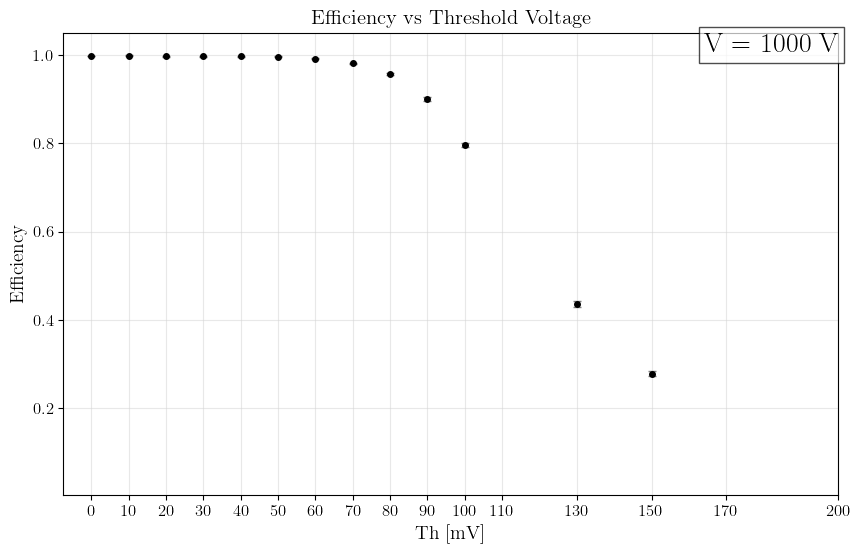

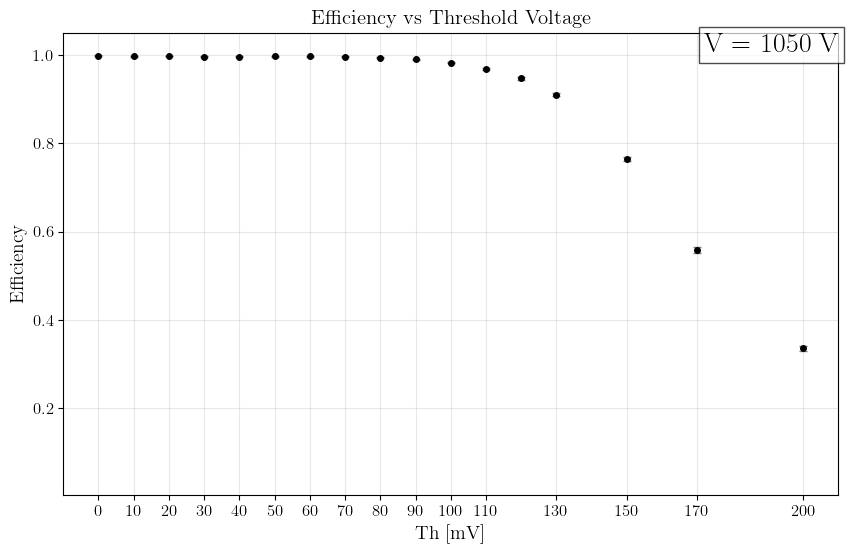

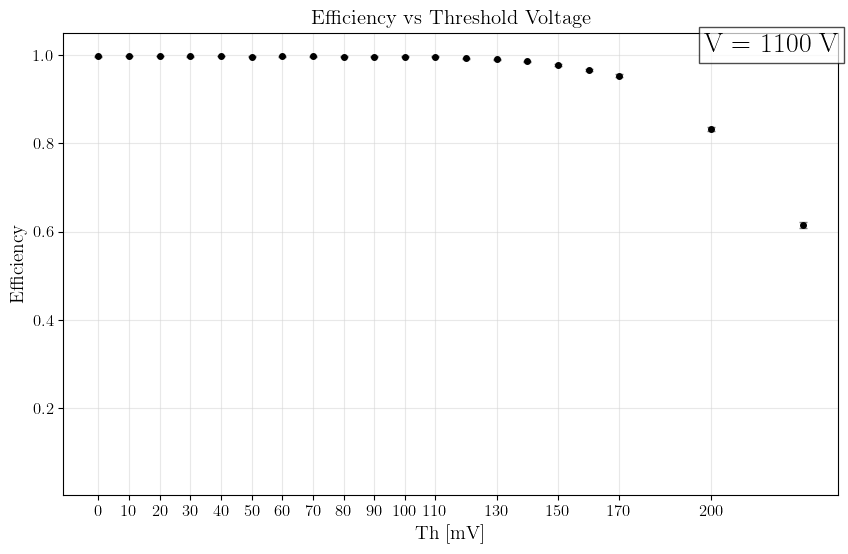

In [37]:
# List of DataFrames and corresponding voltages
dataframes = [df_1, df_2, df_3]
voltages = [1000, 1050, 1100]  # Corresponding voltages for each DataFrame

for i, (df, voltage) in enumerate(zip(dataframes, voltages), start=1):
    plt.figure(figsize=(10, 6))
    
    # Plot with error bars
    plt.errorbar(
        df['Th [mV]'], df['epsilon_2'], 
        yerr=df['sigma_epsilon_2'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    # Add titles and labels
    plt.title('Efficiency vs Threshold Voltage', fontsize=15)
    plt.xlabel('Th [mV]', fontsize=14)
    plt.ylabel('Efficiency', fontsize=14)
    
    # Grid and tick settings
    plt.grid(True, color='lightgray', alpha=0.5)
    plt.xticks(
        ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 130, 150, 170, 200],
        fontsize=12
    )
    plt.yticks(fontsize=12)
    
    # Add voltage annotation as a small box
    plt.text(
        1, 1, f'V = {voltage} V', 
        fontsize=20, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
        transform=plt.gca().transAxes, ha='right', va='top'  # Position at the upper-right corner
    )
    
    # Show the plot
    plt.ylim(0.005, 1.05)
    plt.show()



In [38]:
df_1

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,N_doppie_acc_12,N_doppie_acc_13,N_doppie_acc_23,N_triple_acc,epsilon_2,sigma_epsilon_2
0,1000,0,64309,881469,13002,14892,6016,7830,5998,0.031492,0.000465,0.006367,6.824411e-08,0.997008,0.000704
3,1000,10,31085,133447,12764,7874,5831,7137,5819,0.002305,0.000220,0.000946,4.902558e-09,0.997942,0.000593
4,1000,20,31020,49935,12532,7537,5821,7046,5798,0.000861,0.000216,0.000348,1.797395e-09,0.996049,0.000822
5,1000,30,31694,22915,12753,7626,6068,7155,6044,0.000403,0.000225,0.000162,8.576015e-10,0.996045,0.000806
6,1000,40,30999,13796,12411,7174,5765,6776,5745,0.000238,0.000214,0.000095,4.914551e-10,0.996531,0.000774
1,1000,50,59970,10852,12837,7191,5885,6834,5856,0.000362,0.000428,0.000077,7.735415e-10,0.995072,0.000913
7,1000,60,30867,9708,12743,7061,5894,6872,5842,0.000166,0.000219,0.000069,3.535673e-10,0.991177,0.001218
8,1000,70,30510,9080,12512,6971,5911,6694,5796,0.000154,0.000212,0.000063,3.209453e-10,0.980545,0.001796
9,1000,80,30673,8423,12573,6569,5796,6418,5547,0.000144,0.000214,0.000059,3.007726e-10,0.957039,0.002663
10,1000,90,30252,7672,12555,6208,5726,5921,5149,0.000129,0.000211,0.000054,2.698085e-10,0.899232,0.003978


In [39]:
df_2

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,N_doppie_acc_12,N_doppie_acc_13,N_doppie_acc_23,N_triple_acc,epsilon_2,sigma_epsilon_2
0,1050,0,30786,1255115,12414,10726,5831,7712,5818,0.021467,0.000212,0.008656,4.441450e-08,0.997771,0.000618
1,1050,10,30588,224342,12695,8370,5823,7255,5803,0.003812,0.000216,0.001582,8.066230e-09,0.996565,0.000767
2,1050,20,30714,110517,12472,7741,5797,7097,5779,0.001886,0.000213,0.000766,3.919926e-09,0.996895,0.000731
3,1050,30,30765,57316,12461,7445,5767,6905,5743,0.000980,0.000213,0.000397,2.034520e-09,0.995838,0.000848
4,1050,40,30987,31668,12673,7343,5817,6964,5788,0.000545,0.000218,0.000223,1.151479e-09,0.995015,0.000923
5,1050,50,29795,19937,12554,7146,5724,6860,5703,0.000330,0.000208,0.000139,6.904966e-10,0.996331,0.000799
6,1050,60,29840,14589,12747,7316,5904,7024,5880,0.000242,0.000211,0.000103,5.138171e-10,0.995935,0.000828
7,1050,70,30453,12053,12673,7376,5946,6955,5920,0.000204,0.000214,0.000085,4.307060e-10,0.995627,0.000856
8,1050,80,30362,10321,12624,7024,5765,6694,5726,0.000174,0.000213,0.000072,3.662903e-10,0.993235,0.001080
9,1050,90,30735,9762,12697,7026,5833,6733,5774,0.000167,0.000217,0.000069,3.527357e-10,0.989885,0.001310


In [40]:
df_3

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,N_doppie_acc_12,N_doppie_acc_13,N_doppie_acc_23,N_triple_acc,epsilon_2,sigma_epsilon_2
0,1100,0,30180,1478948,12590,10702,5864,7762,5841,0.024797,0.000211,0.010344,5.203243e-08,0.996078,0.000816
1,1100,10,30001,350033,12522,8783,5883,7331,5865,0.005834,0.000209,0.002435,1.217572e-08,0.996940,0.000720
2,1100,20,29797,191893,12496,7982,5782,7164,5764,0.003177,0.000207,0.001332,6.615748e-09,0.996887,0.000733
3,1100,30,30132,119767,12687,7818,5925,7224,5902,0.002005,0.000212,0.000844,4.239360e-09,0.996118,0.000808
4,1100,40,30040,75431,12566,7477,5786,6974,5770,0.001259,0.000210,0.000527,2.636472e-09,0.997235,0.000690
5,1100,50,30446,47994,12661,7542,5955,7154,5928,0.000812,0.000214,0.000338,1.713016e-09,0.995466,0.000871
6,1100,60,30439,31821,12441,7449,5895,7032,5874,0.000538,0.000210,0.000220,1.115773e-09,0.996438,0.000776
7,1100,70,29780,22526,12518,7156,5713,6829,5692,0.000373,0.000207,0.000157,7.775350e-10,0.996324,0.000801
8,1100,80,30114,17451,12743,7370,5932,7044,5906,0.000292,0.000213,0.000124,6.200642e-10,0.995617,0.000858
9,1100,90,29834,14075,12555,7157,5777,6843,5752,0.000233,0.000208,0.000098,4.881495e-10,0.995672,0.000864


# Summary Plots

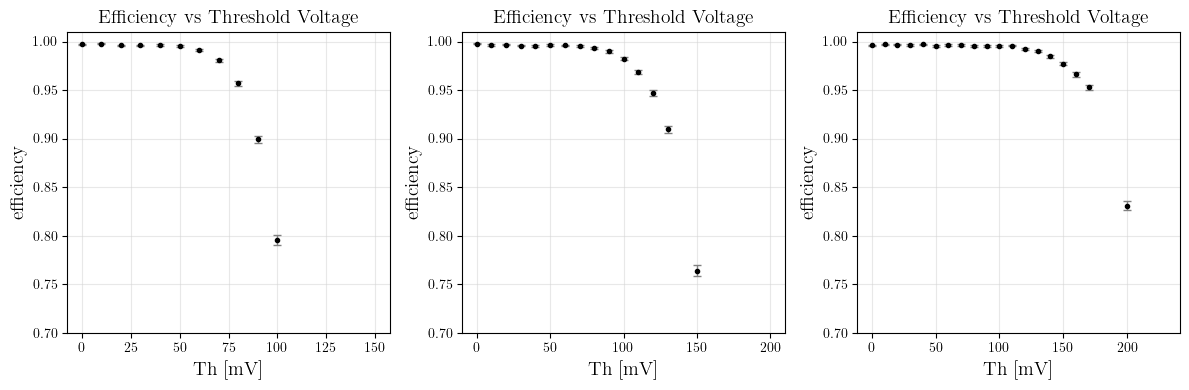

In [51]:
FONT_SIZE = 14
FONT_SIZE = 14
MARKER_SIZE = 3
LINE_WIDTH = 1
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.5

# List of dataframes and corresponding voltages
dataframes = [df_1, df_2, df_3] # Replace/add your actual dataframes here
voltages = [1000, 1050, 1100]  # Replace/add the corresponding voltage values

# Create subplots grid (1 row per dataframe)
rows, cols = 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 4), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()
# Loop over dataframes and axes
for i, (df, V) in enumerate(zip(dataframes, voltages)):
        ax = axes_flat[i]

        ax.errorbar(df['Th [mV]'], df['epsilon_2'], markersize = MARKER_SIZE,
                yerr=df['sigma_epsilon_2'],   # Error bar values
                fmt='o', linewidth=0, color='black',  # Marker and line settings
                ecolor='gray', elinewidth=1, capsize=3)  # Error bar style
        
        ax.set_title('Efficiency vs Threshold Voltage', fontsize = FONT_SIZE)
        ax.set_xlabel('Th [mV]', fontsize = FONT_SIZE)
        ax.set_ylabel('efficiency', fontsize = FONT_SIZE)
        #ax.set_xticks(ticks=[0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize = FONT_SIZE)
        # Uncomment if needed (comment the previous line): 
        # plt.xticks(df_800V['Th [mV]'])  # Optional: set x-ticks to match Th values
        #ax.set_yticks(fontsize = FONT_SIZE)
        ax.set_ylim(0.7, 1.01)
        ax.grid(True, color='lightgray', alpha = 0.5)


# Adjust layout
plt.tight_layout()
plt.show()